# Loan Performance Prediction
Now we have been given two datasets. One includes information of customers who have been given a loan in a 6 month period. The other contains every loan that has been given in this time and whether it has been a good loan or a bad loan. Our goal is to identify which new applicants should be given a loan in the future.

- <a href='#Combine Two Datasets Using SQL'>Combine Two Datasets Using SQL</a>
- <a href='#Data'>Data Preprocessing</a>
- <a href='#Feature'>Feature Engineering</a>
- <a href='#EDA'>Exploratory Data Analysis</a>
- <a href='#Algorithm'>Algortihms Selection</a>


### Combine Two Datasets Using SQL <a name='Combine Two Datasets Using SQL' />
1.	Save two datasets into csv files separetely
2.	Change format of variable “idLoan” in csv file by using “lower” and “mid” function in Excel
3.	Create new feature “Loans_Num” by indicating number of loans for each customer
4.	Import two files into MySQL Workbench
5.	Use inner join to combine two datasets by customer_id  


### Data Preprocessing <a name='Data' />
1. Read combined csv file into python by pandas. There are 659 observations and 34 features
2. Check features' information 
3. Impute missing values

In [159]:
import pandas as pd
loan = pd.read_csv('processed data.csv')
loan.head(10)

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,idLoan,flgGood,Loans_Num
0,0dba6b011d,500,12/27/82,Approved,True,1265,True,10/27/10 14:12,6,True,...,Other,4160,586,527,525,637,592,0dba6b011d,Bad,1
1,96acbba7ed,400,5/9/48,Approved,False,1175,True,10/27/10 19:10,4,True,...,Other,5326,564,526,547,677,598,96acbba7ed,Bad,1
2,289421d82a,500,3/31/89,Approved,False,0,True,10/28/10 07:50,6,True,...,Other,2200,663,501,501,623,531,289421d82a,Bad,1
3,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,Other,1560,614,574,600,656,561,9ece67d6c5,Good,1
4,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,Other,900,708,501,550,651,563,5c2c402094,Bad,1
5,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,Other,1434,687,522,561,661,598,e6254cad30,Good,1
6,ae03151fee,500,6/8/80,Approved,True,190,True,10/30/10 11:53,6,True,...,Other,1200,712,585,663,711,603,ae03151fee,Good,2
7,e55a9a7293,700,3/17/62,Approved,True,750,True,11/4/10 22:34,5,True,...,Other,5260,645,556,556,669,604,e55a9a7293,Bad,1
8,cfe9e0dc5e,800,2/24/61,Approved,False,891,True,11/10/10 23:30,5,True,...,Other,1500,600,622,659,698,656,cfe9e0dc5e,Good,1
9,3744b9845d,500,6/4/60,Approved,False,1172,True,11/15/10 17:14,5,True,...,Other,4191,766,618,623,680,631,3744b9845d,Good,1


In [160]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 34 columns):
customer_id                    659 non-null object
amount_requested               659 non-null int64
birth_date                     659 non-null object
status                         659 non-null object
residence_rent_or_own          659 non-null bool
monthly_rent_amount            659 non-null int64
bank_account_direct_deposit    659 non-null bool
application_when               659 non-null object
loan_duration                  659 non-null int64
payment_ach                    659 non-null bool
num_payments                   659 non-null int64
payment_amount                 659 non-null float64
amount_approved                659 non-null int64
duration_approved              659 non-null int64
payment_amount_approved        637 non-null float64
address_zip                    659 non-null int64
email                          659 non-null object
bank_routing_number            659 non-

#### Missing Values Imputation

In [161]:
loan.apply(lambda x: sum(x.isnull()),axis=0) 

customer_id                      0
amount_requested                 0
birth_date                       0
status                           0
residence_rent_or_own            0
monthly_rent_amount              0
bank_account_direct_deposit      0
application_when                 0
loan_duration                    0
payment_ach                      0
num_payments                     0
payment_amount                   0
amount_approved                  0
duration_approved                0
payment_amount_approved         22
address_zip                      0
email                            0
bank_routing_number              0
email_duration                   0
residence_duration               0
bank_account_duration            1
payment_frequency                0
home_phone_type                  0
other_phone_type               292
how_use_money                    2
monthly_income_amount            0
raw_l2c_score                    0
raw_FICO_telecom                 0
raw_FICO_retail     

In [162]:
# Fill "payment_amount_approved" missing values by multiplying 90% of "payment_amount"
loan['payment_amount_approved'].fillna(loan['payment_amount']*0.9,inplace=True)
loan['payment_amount_approved'].isnull().sum()

0

In [163]:
# Replace missing values in 'other_phone_type' with 'Other' & missing values in 'how_use_money' with 'Other'
loan['other_phone_type'].fillna('Other',inplace=True)
loan['how_use_money'].fillna('Other',inplace=True)

In [164]:
# Replace missing values in 'bank_account_duration' with the mode of the categorical data
loan.bank_account_duration.mode()

0    3+ years
dtype: object

In [165]:
loan['bank_account_duration'].fillna('3+ years',inplace=True)

In [166]:
loan.isnull().sum()

customer_id                    0
amount_requested               0
birth_date                     0
status                         0
residence_rent_or_own          0
monthly_rent_amount            0
bank_account_direct_deposit    0
application_when               0
loan_duration                  0
payment_ach                    0
num_payments                   0
payment_amount                 0
amount_approved                0
duration_approved              0
payment_amount_approved        0
address_zip                    0
email                          0
bank_routing_number            0
email_duration                 0
residence_duration             0
bank_account_duration          0
payment_frequency              0
home_phone_type                0
other_phone_type               0
how_use_money                  0
monthly_income_amount          0
raw_l2c_score                  0
raw_FICO_telecom               0
raw_FICO_retail                0
raw_FICO_bank_card             0
raw_FICO_m

### Feature Engineering <a name='Feature' />

#### Create a feature ‘Age’ indicating the age of the customer by “birth_date“

In [167]:
# Create a new feature "Age"(age of customer) form "birth_date"
birthday = []
for birth in loan['birth_date']:
    birth = birth[:-2]+'19'+birth[-2:]
    birthday.append(birth)
loan['birth_date'] = birthday
    
loan['birth_date'] = pd.to_datetime(loan['birth_date'])

from datetime import date
today = date.today()

age = []
for val in loan['birth_date']:
    Age = today.year - val.year - ((today.month, today.day) < (val.month, val.day))
    age.append(Age)
loan['Age'] = age

0    34
1    69
2    28
3    25
4    26
5    36
6    37
7    55
8    56
9    57
Name: Age, dtype: int64

#### Create a categorical feature ‘email’ indicating which email-service the customer uses (gmail, yahoo, hotmail etc.)

In [168]:
# Change email into categorical data
loan['email'].loc[loan['email'].str.contains('@yahoo') == True] = 'Yahoo'
loan['email'].loc[loan['email'].str.contains('@gmail') == True] = 'Gmail'
loan['email'].loc[loan['email'].str.contains('@hotmail') == True] = 'Hotmail'
loan['email'].loc[loan['email'].str.contains('@bing') == True] = 'Bing'
loan['email'].loc[loan['email'].str.contains('@aol') == True] = 'Aol'

loan['email'].head(10)

0      Yahoo
1      Yahoo
2      Gmail
3      Gmail
4      Yahoo
5    Hotmail
6    Hotmail
7      Yahoo
8    Hotmail
9      Yahoo
Name: email, dtype: object

#### Creating More Features

- Monthly Income by Approved Payment Amount: Indicator of income to debt ratio, higher is better  
- Monthly Income by Approved Amount: Indicator of income to debt ratio, higher is better  
- Monthly Rent by Approved Payment Amount: Indicator of expense to debt ratio, lower is better  

In [169]:
# New Feature: Monthly Income by Approved Payment Amount & Monthly Rent by Approved Payment Amount
loan['Income_By_AppPay']=loan['monthly_income_amount']/loan['payment_amount_approved']
loan['Rent_By_AppPay']=loan['monthly_rent_amount']/loan['payment_amount_approved']
loan['Income_By_AppAmt'] = loan['monthly_income_amount'] / loan['amount_approved']

In [170]:
# Map Loan performance into int
loan['flgGood'] =  loan.flgGood.map({'Bad':0,'Good':1})

In [171]:
# Export dataset to 'loan.csv'
loan.to_csv('loan.csv', sep=',',index=False)  

### Exploratory Data Analysis <a name='EDA' />


In [ ]:
'Age','amount_requested','monthly_rent_amount','loan_duration','num_payments','payment_amount','amount_approved'
                ,'duration_approved','payment_amount_approved','monthly_income_amount','raw_l2c_score','raw_FICO_retail'

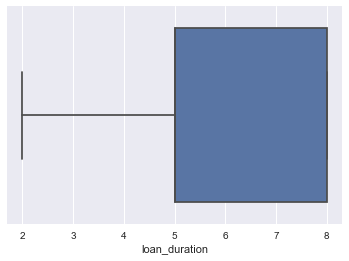

In [177]:
sns.boxplot(x='loan_duration',data=loan)

#### Univariate Plots: how related one feature is to the default rate

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_plot(variable):

    ax1 = sns.countplot(variable,data=loan)
    ax1.set_ylim(0,600)
    ax1.grid(False)

    # Calculate Defualt Rate
    DR = 1-loan.groupby(variable).mean()['flgGood']

    # Middle point for each bar
    xaxis=[]
    for p in ax1.patches:  #divide into single patch
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        xaxis.append(x.mean())

    # Default Rate Line
    ax2 = ax1.twinx()
    ax2.plot(xaxis,DR,'r--', label='Default Rate')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Default Rate')
    ax2.legend()
    ax2.grid(None) 

    # Annotate Defualt Rate
    for i in range(len(DR)):
        ax2.annotate('{:.1f}%'.format(DR[i]*100), (xaxis[i], DR[i]+0.025), 
                ha='center',va='bottom') # set the alignment of the text
    

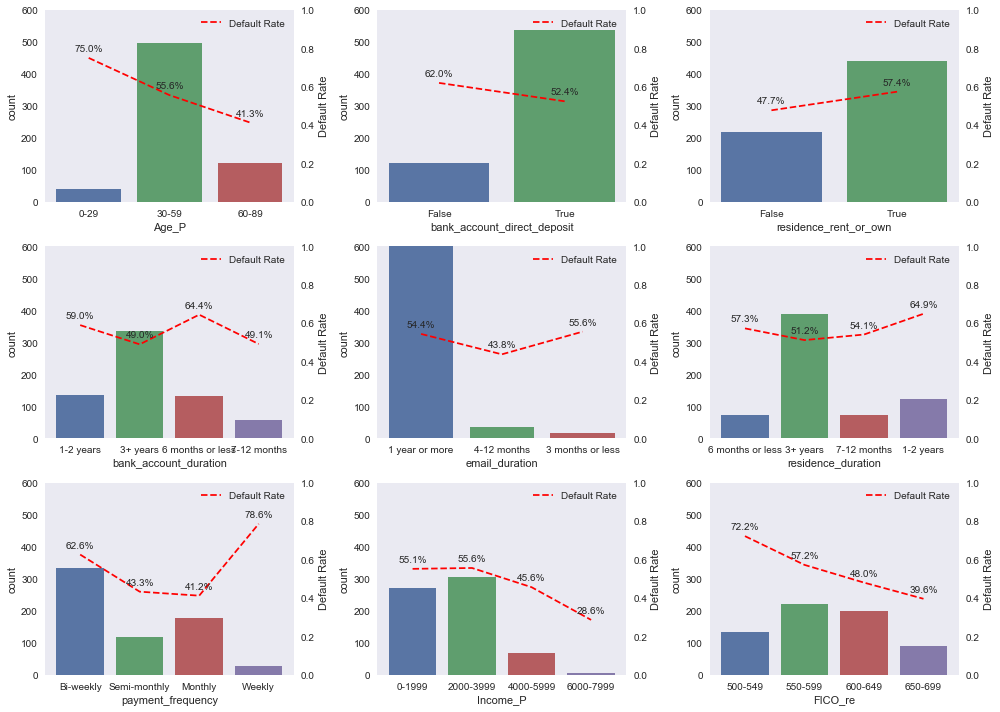

In [49]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,30,60,90]
group_names =['0-29','30-59','60-89']
loan['Age_P'] = pd.cut(loan['Age'],bins,labels=group_names)
draw_plot('Age_P')

plt.subplot(332)
draw_plot('bank_account_direct_deposit')

plt.subplot(333)
draw_plot('residence_rent_or_own')

plt.subplot(334)
draw_plot('bank_account_duration')

plt.subplot(335)
draw_plot('email_duration')

plt.subplot(336)
draw_plot('residence_duration')

plt.subplot(337)
draw_plot('payment_frequency')

plt.subplot(338)
bins = [0,2000,4000,6000,8000]
group_names =['0-1999','2000-3999','4000-5999','6000-7999']
loan['Income_P'] = pd.cut(loan['monthly_income_amount'],bins,labels=group_names)
draw_plot('Income_P')

plt.subplot(339)
bins = [500,550,600,650,700]
group_names =['500-549','550-599','600-649','650-699']
loan['FICO_re'] = pd.cut(loan['raw_FICO_retail'],bins,labels=group_names)
draw_plot('FICO_re')

plt.tight_layout()


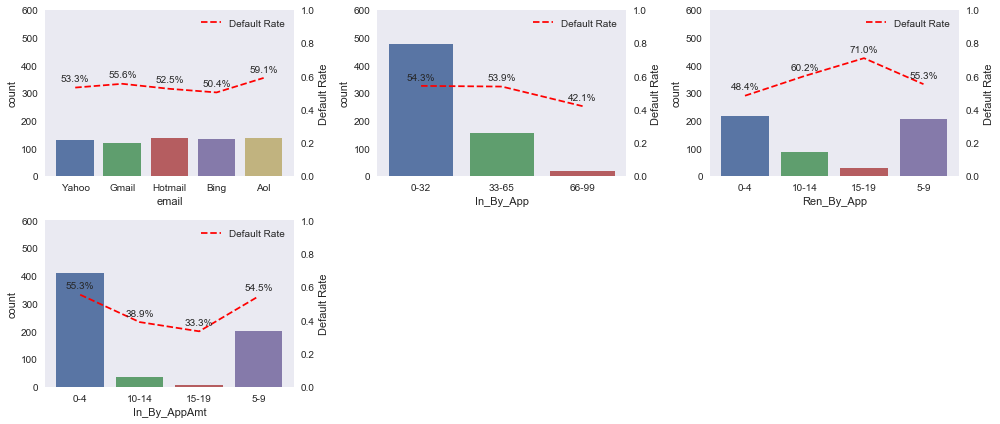

In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(231)
draw_plot('email')

plt.subplot(232)
bins = [0,33,66,100]
group_names =['0-32','33-65','66-99']
loan['In_By_App'] = pd.cut(loan['Income_By_AppPay'],bins,labels=group_names)
draw_plot('In_By_App')

plt.subplot(233)
bins = [0,5,10,15,20]
group_names =['0-4','5-9','10-14','15-19']
loan['Ren_By_App'] = pd.cut(loan['Rent_By_AppPay'],bins,labels=group_names)
draw_plot('Ren_By_App')

plt.subplot(234)
bins = [0,5,10,15,20]
group_names =['0-4','5-9','10-14','15-19']
loan['In_By_AppAmt'] = pd.cut(loan['Income_By_AppAmt'],bins,labels=group_names)
draw_plot('In_By_AppAmt')

plt.tight_layout()

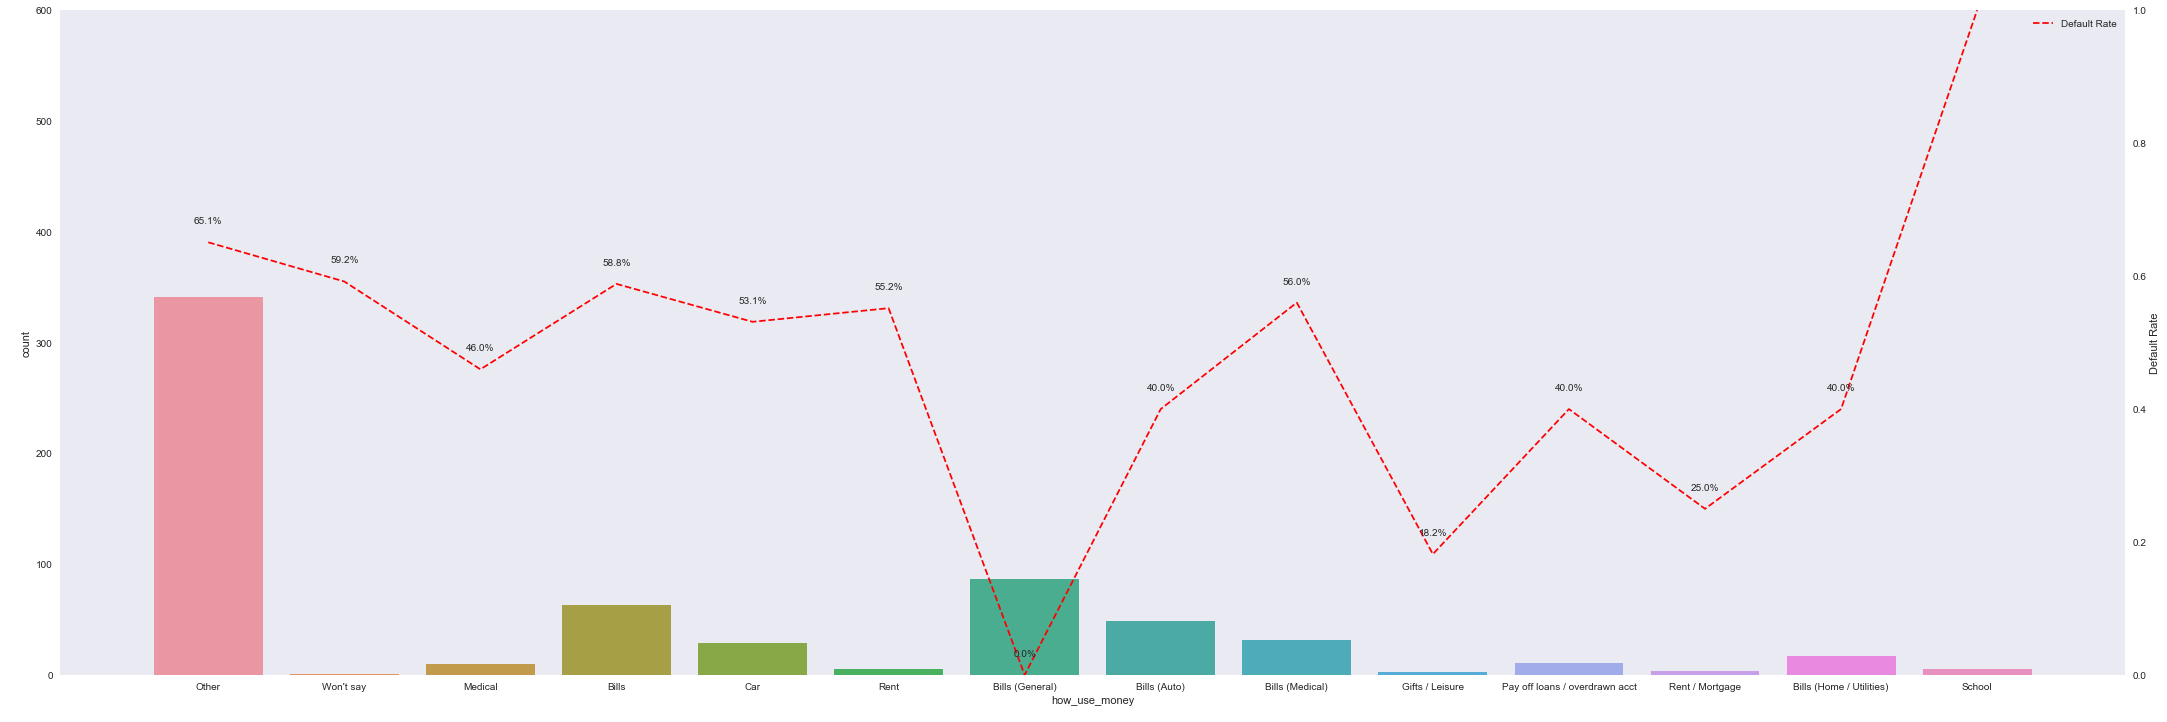

In [51]:
plt.figure(figsize=(30, 10))
draw_plot('how_use_money')
plt.tight_layout()

In [180]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 38 columns):
customer_id                    659 non-null object
amount_requested               659 non-null int64
birth_date                     659 non-null datetime64[ns]
status                         659 non-null object
residence_rent_or_own          659 non-null bool
monthly_rent_amount            659 non-null int64
bank_account_direct_deposit    659 non-null bool
application_when               659 non-null object
loan_duration                  659 non-null int64
payment_ach                    659 non-null bool
num_payments                   659 non-null int64
payment_amount                 659 non-null float64
amount_approved                659 non-null int64
duration_approved              659 non-null int64
payment_amount_approved        659 non-null float64
address_zip                    659 non-null int64
email                          659 non-null object
bank_routing_number            

#### Correlation Heatmap

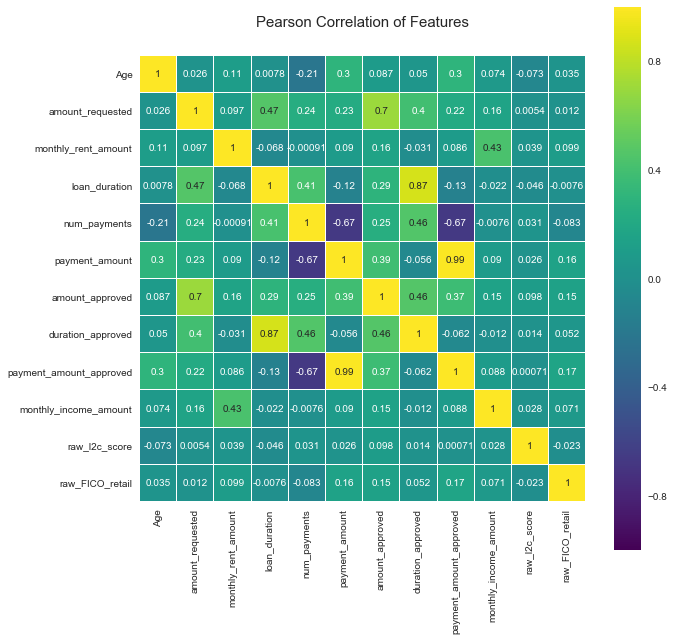

In [16]:
# Calculate Correlation and Draw Correlation Heatmap
loan_int = loan[['Age','amount_requested','monthly_rent_amount','loan_duration','num_payments','payment_amount','amount_approved'
                ,'duration_approved','payment_amount_approved','monthly_income_amount','raw_l2c_score','raw_FICO_retail']]

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(loan_int.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

#### Converting Data Types
- Drop unnecessary features
- Convert boolean to int
- Convert Object to catergorical
- Convert categorical to dummy variables

In [ ]:
loan = pd.read_csv('loan.csv')

## Convert bool into int
loan['residence_rent_or_own'] = loan['residence_rent_or_own'].astype(int)
loan['bank_account_direct_deposit'] = loan['bank_account_direct_deposit'].astype(int)

## Convert object into categorical variable
loan['email'] = loan['email'].astype('category')
loan['email_duration'] = loan['email_duration'].astype('category')
loan['residence_duration'] = loan['residence_duration'].astype('category')
loan['bank_account_duration'] = loan['bank_account_duration'].astype('category')
loan['payment_frequency'] = loan['payment_frequency'].astype('category')
loan['home_phone_type'] = loan['home_phone_type'].astype('category')
loan['how_use_money'] = loan['how_use_money'].astype('category')

loan.dtypes

In [ ]:
loan=pd.get_dummies(loan)
loan.head(10)

In [ ]:
loan.drop(['customer_id','status','application_when','payment_ach',
          'address_zip','bank_routing_number','other_phone_type','amount_requested',
          'loan_duration','idLoan','birth_date','payment_amount'],1,inplace=True)

### Algorithms Selection <a name='Algorithm' />

In [58]:
X = loan.ix[:,loan.columns != 'flgGood']
Y = loan['flgGood']

/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


#### Logistic Regression

In [59]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_auc_score


# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)



## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]

for i in C:
    model = LogisticRegression(C=i) # Create a logistic regression class object
    model.fit(X_train,Y_train) # Train the model
    Y_pred = model.predict(X_test) # Prediction from X_test
    prob = model.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 58.574%
AUC score for C=0.090 is: 60.154%
AUC score for C=0.270 is: 61.360%
AUC score for C=0.810 is: 62.243%
AUC score for C=1.000 is: 62.316%
AUC score for C=3.000 is: 63.066%
AUC score for C=9.000 is: 63.750%
AUC score for C=27.000 is: 64.257%
AUC score for C=81.000 is: 64.364%
AUC score for C=243.000 is: 64.592%


/Users/Frank/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
X_train.shape

(329, 55)

In [76]:
# Feature Selection: compute ANOVA F-value and select features accordaing to the k highest features
k = [20,25,30,35,40,45,50]
for i in k:
    clf = LogisticRegression(C=243.0)
    filter1 = SelectKBest(f_classif, k=i)
    pipe = Pipeline([('anova', filter1), ('logistic', clf)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    prob = pipe.predict_proba(X_test)
    pipe.predict_log_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for k={0:d} is: {1:.3%}'.format(i,score)

AUC score for k=20 is: 65.768%
AUC score for k=25 is: 67.011%
AUC score for k=30 is: 66.132%
AUC score for k=35 is: 65.757%
AUC score for k=40 is: 64.937%
AUC score for k=45 is: 65.055%
AUC score for k=50 is: 63.371%


In [80]:
# Create new dataframe with only desired columns
clf = LogisticRegression(C=243.0)
filter1 = SelectKBest(f_classif, k=25)
pipe = Pipeline([('anova', filter1), ('logistic', clf)])
pipe.fit(X_train, Y_train)

idxs_selected = filter1.get_support(indices=True)
features_new = X.columns[idxs_selected]
print features_new

Index([u'residence_rent_or_own', u'num_payments', u'payment_amount_approved',
       u'raw_l2c_score', u'raw_FICO_telecom', u'raw_FICO_retail',
       u'raw_FICO_bank_card', u'raw_FICO_money', u'Loans_Num', u'Age',
       u'residence_duration_7-12 months', u'bank_account_duration_1-2 years',
       u'bank_account_duration_3+ years',
       u'bank_account_duration_6 months or less',
       u'bank_account_duration_7-12 months', u'payment_frequency_Bi-weekly',
       u'payment_frequency_Monthly', u'payment_frequency_Semi-monthly',
       u'payment_frequency_Weekly', u'how_use_money_Bills',
       u'how_use_money_Bills (General)', u'how_use_money_Gifts / Leisure',
       u'how_use_money_Pay off loans / overdrawn acct',
       u'how_use_money_Rent / Mortgage', u'how_use_money_School'],
      dtype='object')


#### Gaussian Naive Bayes


In [92]:
from sklearn.naive_bayes import GaussianNB

# Fit the training model
NB = GaussianNB()
NB.fit(X_train,Y_train)

# Prediction from X_test
Y_pred = NB.predict(X_test)
prob = NB.predict_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score for is: {0:.3%}'.format(score)

AUC score for is: 67.938%


#### Support Vector Machine with Gaussian Kernel

In [91]:
from sklearn import svm

## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0]

## SVM with a Gaussian kernel
for i in C:
    rbf_svc = svm.SVC(kernel='rbf',C=i,probability=True).fit(X_train,Y_train)
    prob = rbf_svc.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 51.875%
AUC score for C=0.090 is: 48.125%
AUC score for C=0.270 is: 47.812%
AUC score for C=0.810 is: 52.188%
AUC score for C=1.000 is: 52.188%
AUC score for C=3.000 is: 52.188%
